In [149]:
# Get entire output to show
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [172]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score

In [151]:
#Loading csv file on a dataframe

hq = pd.read_csv('healthcare-dataset-stroke-data.csv')
hq.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# DATA PREPARATION

In [152]:
# drop id, work_type, Residence_type, ever_married

hq.drop(['id','work_type', 'Residence_type','ever_married'], axis=1, inplace=True)

In [153]:
hq

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0


In [154]:
# check null values count in each column
hq.isna().sum()
hq.describe() # shows basic statistics of the dataset including the mean

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [155]:
# fill out missing bmi values with the mean
bmi = round(hq['bmi'].mean(),1) # rounds the mean of the bmi column (28.893237) to one decimal place and storing it in bmi variable
hq['bmi'].fillna(bmi, inplace=True) # fill NaN bmi values with the mean of the bmi column


In [156]:
hq
hq.describe()
hq.info()
hq['gender'].unique()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,28.9,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,28.9,never smoked,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893503,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


array(['Male', 'Female', 'Other'], dtype=object)

In [157]:
# categorizing the age attribute
hq['age'].fillna(0,inplace=True)
bins = [0,18,36,54,72,90] # creates bins for sorting the data
labels = ['0 - 18','18 - 36','36 - 54','54 - 72','72 - 90'] # labels for the various bins
hq['age'] = pd.cut(hq['age'], bins=bins, labels=labels) # converts the data to the categorical
hq.head()
hq.info()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,54 - 72,0,1,228.69,36.6,formerly smoked,1
1,Female,54 - 72,0,0,202.21,28.9,never smoked,1
2,Male,72 - 90,0,1,105.92,32.5,never smoked,1
3,Female,36 - 54,0,0,171.23,34.4,smokes,1
4,Female,72 - 90,1,0,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   object  
 1   age                5110 non-null   category
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   avg_glucose_level  5110 non-null   float64 
 5   bmi                5110 non-null   float64 
 6   smoking_status     5110 non-null   object  
 7   stroke             5110 non-null   int64   
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 284.8+ KB


# LEVEL ONE (DESCRIPTIVE STATISTICS)

In [158]:
hq.describe() # info for numerical data
hq.describe(include=['O']) # info for strings data
hq.describe(include=['category']) # info for categorical data

,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,28.893503,0.048728
std,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,0.000000,77.245000,23.800000,0.000000
50%,0.000000,0.000000,91.885000,28.400000,0.000000
75%,0.000000,0.000000,114.090000,32.800000,0.000000
max,1.000000,1.000000,271.740000,97.600000,1.000000


,gender,smoking_status
count,5110,5110
unique,3,4
top,Female,never smoked
freq,2994,1892


,age
count,5110
unique,5
top,36 - 54
freq,1380


<Figure size 2000x2000 with 0 Axes>

array([[<AxesSubplot: title={'center': 'hypertension'}>,
        <AxesSubplot: title={'center': 'heart_disease'}>],
       [<AxesSubplot: title={'center': 'avg_glucose_level'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'stroke'}>, <AxesSubplot: >]],
      dtype=object)

<Figure size 2000x2000 with 0 Axes>

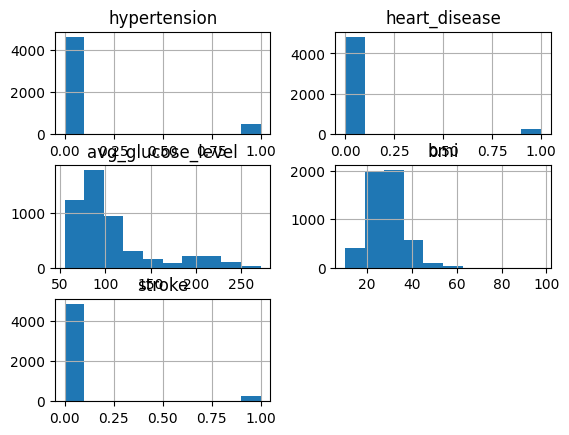

In [159]:
plt.figure(figsize=(20,20))
hq.hist() # plot a histogram
plt.show()

# LEVEL TWO (INFERENTIAL ANALYSIS)

,hypertension,heart_disease,avg_glucose_level,bmi,stroke
hypertension,1.000000,0.108306,0.174474,0.160205,0.127904
heart_disease,0.108306,1.000000,0.161857,0.038916,0.134914
avg_glucose_level,0.174474,0.161857,1.000000,0.168767,0.131945
bmi,0.160205,0.038916,0.168767,1.000000,0.038971
stroke,0.127904,0.134914,0.131945,0.038971,1.000000


<AxesSubplot: >

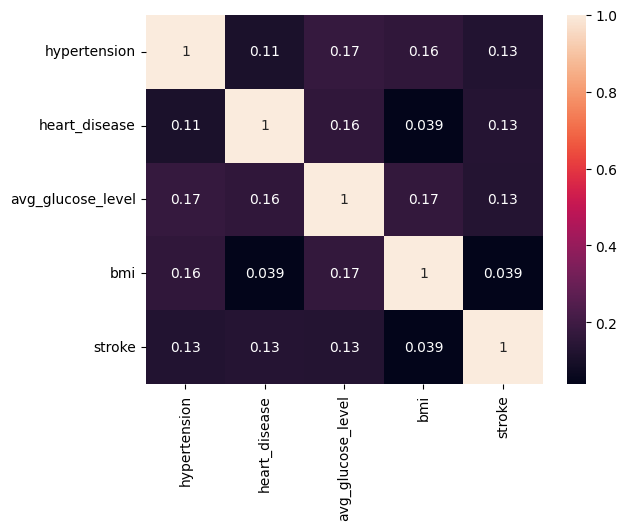

In [160]:
# correlation
# create a correlation matrix 
corr_matrix = hq.corr(numeric_only=True) 
corr_matrix

# create a heatmap 
sns.heatmap(corr_matrix, annot=True)
plt.show()

# -1 : perfect negative
# 1 : perfect positive


# LEVEL 3 ANALYSIS (PREDICTIVE ANALYSIS)

In [161]:
hq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   object  
 1   age                5110 non-null   category
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   avg_glucose_level  5110 non-null   float64 
 5   bmi                5110 non-null   float64 
 6   smoking_status     5110 non-null   object  
 7   stroke             5110 non-null   int64   
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 284.8+ KB


In [169]:
hq['gender'] = hq['gender'].replace({'Other': 2, 'Male': 1, 'Female': 0})
hq['smoking_status'] = hq['smoking_status'].replace({'formerly smoked': 3, 'never smoked': 2, 'smokes': 1, 'Unknown': 0})

In [170]:
hq

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,54 - 72,0,1,228.69,36.6,3,1
1,0,54 - 72,0,0,202.21,28.9,2,1
2,1,72 - 90,0,1,105.92,32.5,2,1
3,0,36 - 54,0,0,171.23,34.4,1,1
4,0,72 - 90,1,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...
5105,0,72 - 90,1,0,83.75,28.9,2,0
5106,0,72 - 90,0,0,125.20,40.0,2,0
5107,0,18 - 36,0,0,82.99,30.6,2,0
5108,1,36 - 54,0,0,166.29,25.6,3,0


In [173]:
X = hq.drop(['stroke','age'],axis=1)
y = hq['stroke']

DataModels = pd.DataFrame()

def TrainandTestwithMinMaxScalar(X,y,algorithm,modelname):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    norm = MinMaxScaler().fit(X_train)

    X_train = norm.transform(X_train)

    X_test = norm.transform(X_test)

    model = algorithm
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)

    score = round((accuracy_score(y_test, prediction)*100),2)
    print("\nModel Score:",score,"%")
    print("Precision:", precision_score(y_test, prediction))
    print("Recall:", recall_score(y_test, prediction))
    print("F1 score:", f1_score(y_test, prediction))
    print("ROC-AUC score:", roc_auc_score(y_test, prediction))
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print()
    
    model = {}
    
    model['Algorithm'] = modelname
    model['Model Score'] = str(score) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

algorithms = {"Random Forest":RandomForestClassifier(),"Decision Tree":DecisionTreeClassifier(),
              "Logistic Regression":LogisticRegression(),"K-Nearest Neighbour":KNeighborsClassifier(n_neighbors=3),
              "Support Vector Classifier":SVC()}

for i,j in algorithms.items():
    print("Algorithm Performance: {}".format(i))
    
    model = TrainandTestwithMinMaxScalar(X,y,j,i)
    DataModels = DataModels.append(model,ignore_index=True)
    
    print()    

Algorithm Performance: Random Forest

Model Score: 94.62 %
Precision: 0.125
Recall: 0.02040816326530612
F1 score: 0.03508771929824561
ROC-AUC score: 0.5066069593304948
Confusion Matrix:
 [[966   7]
 [ 48   1]]


Algorithm Performance: Decision Tree


/var/folders/5m/1db7tmxj0xl9lp3_7cnxt1vw0000gn/T/ipykernel_41873/1918903503.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataModels = DataModels.append(model,ignore_index=True)
/var/folders/5m/1db7tmxj0xl9lp3_7cnxt1vw0000gn/T/ipykernel_41873/1918903503.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataModels = DataModels.append(model,ignore_index=True)
/Users/akackon/.anyenv/envs/pyenv/versions/3.9.12/envs/dav/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akackon/.anyenv/envs/pyenv/versions/3.9.12/envs/dav/lib/python3.9/site-packages/sklearn/metrics/_classifica


Model Score: 91.68 %
Precision: 0.047619047619047616
Recall: 0.0425531914893617
F1 score: 0.04494382022471909
ROC-AUC score: 0.5007637752318604
Confusion Matrix:
 [[935  40]
 [ 45   2]]


Algorithm Performance: Logistic Regression

Model Score: 94.91 %
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC-AUC score: 0.5
Confusion Matrix:
 [[970   0]
 [ 52   0]]


Algorithm Performance: K-Nearest Neighbour

Model Score: 94.42 %
Precision: 0.23529411764705882
Recall: 0.08333333333333333
F1 score: 0.12307692307692308
ROC-AUC score: 0.5349931553730322
Confusion Matrix:
 [[961  13]
 [ 44   4]]


Algorithm Performance: Support Vector Classifier

Model Score: 94.81 %
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC-AUC score: 0.5
Confusion Matrix:
 [[969   0]
 [ 53   0]]




/Users/akackon/.anyenv/envs/pyenv/versions/3.9.12/envs/dav/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akackon/.anyenv/envs/pyenv/versions/3.9.12/envs/dav/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/5m/1db7tmxj0xl9lp3_7cnxt1vw0000gn/T/ipykernel_41873/1918903503.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataModels = DataModels.append(model,ignore_index=True)
